# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [534]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [535]:
df_raw = pd.read_csv("C:/Users/AMKT086/Documents/Data Science Course/Notes & Homework/unit-project-03/assets/admissions.csv")

In [536]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [537]:
#2. Summary Statistics & Looking at the data
# summarize the data
print(df_raw.describe())

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [538]:
# take a look at the standard deviation of each column
print(df_raw.std())

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64


In [539]:
#Drop NA
df = df_raw.dropna() 
print(df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


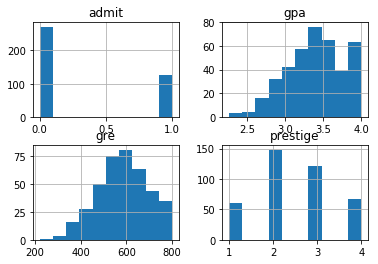

In [540]:
# plot all of the columns, better visualization
df.hist()
pl.show()

## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [541]:
# frequency table for prestige and whether or not someone was admitted
table = pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

#table = pd.crosstab(index=df['admit'], columns=df['prestige'])
print(table)

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [542]:
#Check dataset info
df.info()

#Create dummy variables for prestige
df = df.join(pd.get_dummies(df['prestige']))
print(df.head())

#Drop original prestige level - not require anymore
df_clean = df.drop(columns = ['prestige'])
df_clean.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB
   admit    gre   gpa  prestige  1.0  2.0  3.0  4.0
0      0  380.0  3.61       3.0    0    0    1    0
1      1  660.0  3.67       3.0    0    0    1    0
2      1  800.0  4.00       1.0    1    0    0    0
3      1  640.0  3.19       4.0    0    0    0    1
4      0  520.0  2.93       4.0    0    0    0    1


,admit,gre,gpa,1.0,2.0,3.0,4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We need 4 variables

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [543]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print(handCalc.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             0
1      1  660.0  3.67             1             0             0
2      1  800.0  4.00             0             1             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             0


In [544]:
#crosstab prestige 1 admission 
#frequency table cutting prestige and whether or not someone was admitted

#Filter by prestige == 1.0
df_prestige1 = df.loc[(df['prestige'] == 1.0) ]
df_prestige1.head()   

#Filter only admit and prestige columns
df_prestige_admit = df_prestige1[['admit','prestige']]
df_prestige_admit.head()

#Aggregate table for prestige 1, admit 1 and 0.
df_prestige_admit_tab = pd.crosstab(index=df_prestige_admit["prestige"],columns=df_prestige_admit["admit"])     
print (df_prestige_admit_tab)

admit      0   1
prestige        
1.0       28  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [115]:
#Summary: There are total of 33/61(54%) admission from prestige 1.

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [545]:
#Prestige 2
#Filter by prestige == 2.0
df_prestige2 = df.loc[(df['prestige'] == 2.0) ]
df_prestige2.head() 
#Filter only admit and prestige columns
df_prestige_admit2 = df_prestige2[['admit','prestige']]
df_prestige_admit2.head()
#Aggregate table for prestige 1, admit 1 and 0.
df_prestige_admit_tab2 = pd.crosstab(index=df_prestige_admit2["prestige"],columns=df_prestige_admit2["admit"])     
print (df_prestige_admit_tab2)

#Prestige 3
#Filter by prestige == 3.0
df_prestige3 = df.loc[(df['prestige'] == 3.0) ]
df_prestige3.head() 
#Filter only admit and prestige columns
df_prestige_admit3 = df_prestige3[['admit','prestige']]
df_prestige_admit3.head()
#Aggregate table for prestige 1, admit 1 and 0.
df_prestige_admit_tab3 = pd.crosstab(index=df_prestige_admit3["prestige"],columns=df_prestige_admit3["admit"])     
print (df_prestige_admit_tab3)

#Prestige 4
#Filter by prestige == 4.0
df_prestige4 = df.loc[(df['prestige'] == 4.0) ]
df_prestige4.head() 
#Filter only admit and prestige columns
df_prestige_admit4 = df_prestige4[['admit','prestige']]
df_prestige_admit4.head()
#Aggregate table for prestige 1, admit 1 and 0.
df_prestige_admit_tab4 = pd.crosstab(index=df_prestige_admit4["prestige"],columns=df_prestige_admit4["admit"])     
print (df_prestige_admit_tab4)

admit      0   1
prestige        
2.0       95  53
admit      0   1
prestige        
3.0       93  28
admit      0   1
prestige        
4.0       55  12


In [557]:
#Example - Filter prestige 1.0 and prestige 4.
#Purpose to calculate the difference between prestige 1 and 4 students
df_filtered = df.loc[ (df['prestige'] == 1.0) | (df['prestige'] == 4.0) ]
#print(df_filtered)

# Only interested on categorial variable - admit and prestige only
# Hypothesis: Understand if the student from prestige 1 is more likely to be admited than prestige 4.
df_filtered2 = df_filtered[['admit','prestige']]
#print(df_filtered2)

# Filter prestige & admit variables only in count
df_OR_tab = pd.crosstab(index=df_filtered2["prestige"],columns=df_filtered2["admit"])
print(df_OR_tab)

#Swapped columns between admit 1 and admit 0
df_OR_tab2 = df_OR_tab[[1,0]]
print(df_OR_tab2)

#Print out the values
pres1_admit1 = df_OR_tab2.loc[1,1]
pres4_admit1 = df_OR_tab2.loc[4,1]
pres1_admit0 = df_OR_tab2.loc[1,0]
pres4_admit0 = df_OR_tab2.loc[4,0]

print(pres1_admit1)
print(pres4_admit1)
print(pres1_admit0)
print(pres4_admit0)

#Calculating Odd ratio from printed values
Odd_ratio = (pres1_admit1 / pres4_admit1) / (pres1_admit0 / pres4_admit0)

print (Odd_ratio)

#Summary: Students from prestige 1 are 5 times more likely to admit compare to prestige 4.

admit      0   1
prestige        
1.0       28  33
4.0       55  12
admit      1   0
prestige        
1.0       33  28
4.0       12  55
33
12
28
55
5.401785714285714


#### 3.3 Calculate the odds ratio

In [126]:
#Prestige2 admission:
#Odd ratio = 53/(53+95) = 35.8%

#Prestige3 admission:
#Odd ratio = 28/(28+93) = 23.1%

#Prestige4 admission:
#Odd ratio = 12/(12+55) = 17.9%

#### 3.4 Write this finding in a sentenance: 

Answer: The results shows students from prestige 4 are less likely to admit than student from prestige 1,2,3.

#### 3.5 Print the cross tab for prestige_4

In [127]:
print (df_prestige_admit_tab4)

admit      0   1
prestige        
4.0       55  12


#### 3.6 Calculate the OR 

In [129]:
#Prestige4 admission:
#Odd ratio = 12/(12+55) = 17.9%

#### 3.7 Write this finding in a sentence

Answer: The odd ratio for prestige 4 students is 17.9%. This signify that there's only 17.9% of the students from prestige 4 are more likely for admission, in comparison to odd ratio for prestige 1 of 54% admission rate. 

## Part 4. Analysis

In [184]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print(data.head())

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [185]:
# manually add the intercept
data['intercept'] = 1.0
print(data.head())

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0  \
0      0  380.0  3.61             0             0             1             0   
1      1  660.0  3.67             0             0             1             0   
2      1  800.0  4.00             1             0             0             0   
3      1  640.0  3.19             0             0             0             1   
4      0  520.0  2.93             0             0             0             1   

   intercept  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  


#### 4.1 Set the covariates to a variable called train_cols

In [314]:
train_cols = data.columns[1:]
print(data.columns[1:])

#Logistic Regression
logit = sm.Logit(data['admit'], data[train_cols])
print(logit)

Index(['gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0',
       'prestige_4.0', 'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [315]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [162]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:                 0.08166
Time:                        14:09:48   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_1.0    -0.0609   9.18e+06  -6.64e-0

In [ ]:
Summary: 
#There is an inverse relationship between the probability of being admitted and the prestige of a candidate in undergraduate school.
#Hence, the probability of being accepted into program is highers for student who attended top ranked (prestige 1) as opposed to a lower rank school (prestige 2-4)

In [163]:
print(result.conf_int())

                         0             1
gre           7.444681e-05  4.362360e-03
gpa           1.276188e-01  1.431056e+00
prestige_1.0 -1.798995e+07  1.798995e+07
prestige_2.0 -1.798995e+07  1.798995e+07
prestige_3.0 -1.798996e+07  1.798995e+07
prestige_4.0 -1.798996e+07  1.798995e+07
intercept    -1.798996e+07  1.798995e+07


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [382]:
#Odd ratio breakdown
np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_1.0    0.940893
prestige_2.0    0.476607
prestige_3.0    0.246695
prestige_4.0    0.199023
intercept       0.022017
dtype: float64

In [383]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_1.0  0.000000       inf  0.940893
prestige_2.0  0.000000       inf  0.476607
prestige_3.0  0.000000       inf  0.246695
prestige_4.0  0.000000       inf  0.199023
intercept     0.000000       inf  0.022017


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


#### 4.5 Interpret the OR of Prestige_2

Answer: 
Odd ratio for prestige 2: 0.477
* The odd ratio is less than 1 means student from prestige 2 are less likely to admit than prestige 1(odd ratio: 0.94)

#### 4.6 Interpret the OR of GPA

Answer: 
Odd ratio for GPA: 2.18
*The odd ratio > 1 indicate that student with higher GPA are 2.18 times more likely to admit than other variables. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [410]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    m = int(m)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

#amended xrange(python 2) to range (python 3)
#add m = int(m), changing to integer

In [501]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print(gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print(gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
model = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
print(model.head(10))

[220.         284.44444444 348.88888889 413.33333333 477.77777778
 542.22222222 606.66666667 671.11111111 735.55555556 800.        ]
[2.26       2.45333333 2.64666667 2.84       3.03333333 3.22666667
 3.42       3.61333333 3.80666667 4.        ]
       0         1    2    3
0  220.0  2.260000  1.0  1.0
1  220.0  2.260000  2.0  1.0
2  220.0  2.260000  3.0  1.0
3  220.0  2.260000  4.0  1.0
4  220.0  2.453333  1.0  1.0
5  220.0  2.453333  2.0  1.0
6  220.0  2.453333  3.0  1.0
7  220.0  2.453333  4.0  1.0
8  220.0  2.646667  1.0  1.0
9  220.0  2.646667  2.0  1.0


#### 5.1 Recreate the dummy variables

In [502]:
# recreate the dummy variables
model.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(model['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
print(dummy_ranks.head())

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
model = model[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1.0':])
print(model.head(20))

print (model.columns.tolist())
print (dummy_ranks.columns.tolist())



   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             1             0             0             0
1             0             1             0             0
2             0             0             1             0
3             0             0             0             1
4             1             0             0             0
      gre       gpa  prestige  intercept  prestige_1.0  prestige_2.0  \
0   220.0  2.260000       1.0        1.0             1             0   
1   220.0  2.260000       2.0        1.0             0             1   
2   220.0  2.260000       3.0        1.0             0             0   
3   220.0  2.260000       4.0        1.0             0             0   
4   220.0  2.453333       1.0        1.0             1             0   
5   220.0  2.453333       2.0        1.0             0             1   
6   220.0  2.453333       3.0        1.0             0             0   
7   220.0  2.453333       4.0        1.0             0             0   
8   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


#### 5.2 Make predictions on the enumerated dataset

In [496]:
# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])
print(combos.head())
print(combos.tail())
len(combos)

     gre       gpa  prestige  intercept  prestige_1.0  prestige_2.0  \
0  220.0  2.260000       1.0        1.0             1             0   
1  220.0  2.260000       2.0        1.0             0             1   
2  220.0  2.260000       3.0        1.0             0             0   
3  220.0  2.260000       4.0        1.0             0             0   
4  220.0  2.453333       1.0        1.0             1             0   

   prestige_3.0  prestige_4.0  admit_pred  
0             0             0    0.164173  
1             0             0    0.090492  
2             1             0    0.048977  
3             0             1    0.039890  
4             0             0    0.185907  
       gre       gpa  prestige  intercept  prestige_1.0  prestige_2.0  \
395  800.0  3.806667       4.0        1.0             0             0   
396  800.0  4.000000       1.0        1.0             1             0   
397  800.0  4.000000       2.0        1.0             0             1   
398  800.0  4.000

400

#### 5.3 Interpret findings for the last 4 observations

Answer: 
- Worth noting that the probability of admission gradually increases as gre and gpa increases. 
- The different prestige levels yield drastic probabilities of admission particularly the most(prestige_1)/least(prestige_3 & Prestige_4) pretigious schools. 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

                     admit_pred
gre        prestige            
220.000000 1.0         0.287000
           2.0         0.172354
           3.0         0.098493
           4.0         0.081236
284.444444 1.0         0.315963


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


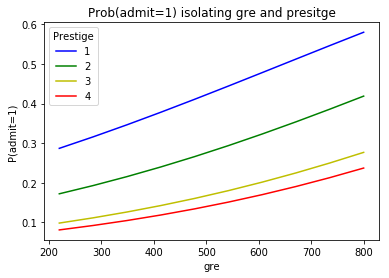

                   admit_pred
gpa      prestige            
2.260000 1.0         0.279423
         2.0         0.166760
         3.0         0.094879
         4.0         0.078172
2.453333 1.0         0.309664


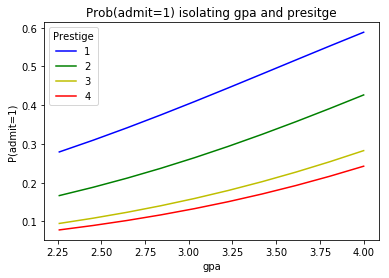

In [508]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    print(grouped.head())
   
    # make a plot    
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')
